In [0]:
import cv2
import torch
from torch.autograd import Variable
import torch.nn as nn
import argparse
import numpy as np
from os import path, mkdir

from time import time

In [2]:
use_gpu = torch.cuda.is_available()
print (use_gpu)

numClasses = 4
numPoints = 4
imgSize = (480, 480)
batchSize = 8 if use_gpu else 8


provNum, alphaNum, adNum = 38, 25, 35

True


In [0]:
class wR2(nn.Module):
    def __init__(self, num_classes=1000):
        super(wR2, self).__init__()
        hidden1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=48, kernel_size=5, padding=2, stride=2),
            nn.BatchNorm2d(num_features=48),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        hidden2 = nn.Sequential(
            nn.Conv2d(in_channels=48, out_channels=64, kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        hidden3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        hidden4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=160, kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=160),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        hidden5 = nn.Sequential(
            nn.Conv2d(in_channels=160, out_channels=192, kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        hidden6 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192, kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        hidden7 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192, kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        hidden8 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192, kernel_size=5, padding=2),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        hidden9 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            nn.Dropout(0.2)
        )
        hidden10 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=192, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1, padding=1),
            nn.Dropout(0.2)
        )
        self.features = nn.Sequential(
            hidden1,
            hidden2,
            hidden3,
            hidden4,
            hidden5,
            hidden6,
            hidden7,
            hidden8,
            hidden9,
            hidden10
        )
        self.classifier = nn.Sequential(
            nn.Linear(63360, 100),
            # nn.ReLU(inplace=True),
            nn.Linear(100, 100),
            # nn.ReLU(inplace=True),
            nn.Linear(100, 12),
        )

    def forward(self, x):
        x1 = self.features(x)
        x11 = x1.view(x1.size(0), -1)
        x = self.classifier(x11)
        return x


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import pandas as pd
import glob
name=names=(glob.glob("/content/drive/My Drive/ccpd_db/*"))

In [0]:
df=pd.DataFrame(names)

In [0]:
df.columns=["names"]

In [8]:
df.head()

,names
0,/content/drive/My Drive/ccpd_db/00400862068966...
1,/content/drive/My Drive/ccpd_db/00844827586207...
2,/content/drive/My Drive/ccpd_db/00774425287357...
3,/content/drive/My Drive/ccpd_db/00662715517241...
4,/content/drive/My Drive/ccpd_db/00621048850574...


In [9]:
df=df["names"].str.split("/",n=-1,expand = True)
df.head()

,0,1,2,3,4,5
0,,content,drive,My Drive,ccpd_db,00400862068966-90_85-194_575_307_615-306_610_2...
1,,content,drive,My Drive,ccpd_db,00844827586207-90_93-231_447_396_506-381_497_2...
2,,content,drive,My Drive,ccpd_db,00774425287357-90_89-363_462_523_522-515_516_3...
3,,content,drive,My Drive,ccpd_db,00662715517241-90_90-288_576_437_623-430_619_2...
4,,content,drive,My Drive,ccpd_db,00621048850574-96_83-284_527_385_597-379_588_2...


In [10]:
df=df.drop(columns=[0,1,2,3,4])
df.head()

,5
0,00400862068966-90_85-194_575_307_615-306_610_2...
1,00844827586207-90_93-231_447_396_506-381_497_2...
2,00774425287357-90_89-363_462_523_522-515_516_3...
3,00662715517241-90_90-288_576_437_623-430_619_2...
4,00621048850574-96_83-284_527_385_597-379_588_2...


In [0]:
df=df[5].str.split("_",n=-1,expand = True)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,00400862068966-90,85-194,575,307,615-306,610,200,608,198,579,304,580-0,0,29,26,15,29,29-186-11.jpg
1,00844827586207-90,93-231,447,396,506-381,497,236,499,238,453,383,451-0,0,13,2,27,24,26-193-11.jpg
2,00774425287357-90,89-363,462,523,522-515,516,369,514,369,472,516,474-0,9,15,26,32,26,24-26-12.jpg
3,00662715517241-90,90-288,576,437,623-430,619,295,620,295,580,429,579-0,0,8,17,33,32,33-195-11.jpg
4,00621048850574-96,83-284,527,385,597-379,588,288,577,288,531,379,542-0,0,31,24,32,32,32-189-14.jpg


In [0]:
df1=df[1].str.split("-",n=-1,expand=True)

In [14]:
df1=pd.concat([df1,df[2],df[3]],axis=1)
df1.head()

,0,1,2,3
0,85,194,575,307
1,93,231,447,396
2,89,363,462,523
3,90,288,576,437
4,83,284,527,385


In [15]:
df2=df[4].str.split("-",n=-1,expand=True)
df1=pd.concat([df1,df2,df[5],df[6],df[7],df[8],df[9],df[10]],axis=1)
df1.head()

,0,1,2,3,0,1,5,6,7,8,9,10
0,85,194,575,307,615,306,610,200,608,198,579,304
1,93,231,447,396,506,381,497,236,499,238,453,383
2,89,363,462,523,522,515,516,369,514,369,472,516
3,90,288,576,437,623,430,619,295,620,295,580,429
4,83,284,527,385,597,379,588,288,577,288,531,379


In [16]:
df3=df[11].str.split('-',n=-1,expand=True)
df1=pd.concat([df1,df3[0]],axis=1)
df1.head()

,0,1,2,3,0,1,5,6,7,8,9,10,0
0,85,194,575,307,615,306,610,200,608,198,579,304,580
1,93,231,447,396,506,381,497,236,499,238,453,383,451
2,89,363,462,523,522,515,516,369,514,369,472,516,474
3,90,288,576,437,623,430,619,295,620,295,580,429,579
4,83,284,527,385,597,379,588,288,577,288,531,379,542


In [17]:
col=[0,1,2,3,4,5,6,7,8,9,10,11,12]
df1.columns

Int64Index([0, 1, 2, 3, 0, 1, 5, 6, 7, 8, 9, 10, 0], dtype='int64')

In [0]:
df1.columns=col

In [19]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,85,194,575,307,615,306,610,200,608,198,579,304,580
1,93,231,447,396,506,381,497,236,499,238,453,383,451
2,89,363,462,523,522,515,516,369,514,369,472,516,474
3,90,288,576,437,623,430,619,295,620,295,580,429,579
4,83,284,527,385,597,379,588,288,577,288,531,379,542


In [0]:
df=df1.drop(0,axis=1)

In [0]:
df.head()
df=df.astype(int)

In [0]:
dfnamelist=pd.DataFrame(names)

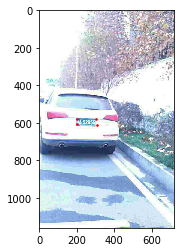

In [23]:
import matplotlib.pyplot as plt
from skimage import io, transform
plt.ion()  
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks.loc[0,7],landmarks.loc[0,8] ,s=10, marker='.', c='r')
    plt.scatter(landmarks.loc[0,5],landmarks.loc[0,6] ,s=10, marker='.', c='r')
    plt.scatter(landmarks.loc[0,9],landmarks.loc[0,10] ,s=10, marker='.', c='r')
    plt.scatter(landmarks.loc[0,11],landmarks.loc[0,12] ,s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(dfnamelist.iloc[0,0]),df)
plt.show()

In [24]:
dfnamelist.iloc[0,0]

'/content/drive/My Drive/ccpd_db/00400862068966-90_85-194_575_307_615-306_610_200_608_198_579_304_580-0_0_29_26_15_29_29-186-11.jpg'

In [0]:
def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = dfnamelist.iloc[idx,0]
        image = io.imread(img_name)
        landmarks = self.df.iloc[idx, 0:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [26]:
image=io.imread(dfnamelist.iloc[0,0])
image.dtype

dtype('uint8')

In [0]:
import torchvision.transforms as transforms
from PIL import Image

images=glob.glob("/content/drive/My Drive/ccpd_db/*jpg")
for image in images:
  
  img = Image.open(image)
  
  trans1 = transforms.ToTensor()
  data=trans1(img)
  
  

In [0]:
import torch
from torchvision import transforms, datasets

data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
hymenoptera_dataset = datasets.ImageFolder(root='/content/drive/My Drive',
                                           transform=data_transform)
dataset_loader = torch.utils.data.DataLoader(hymenoptera_dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

In [0]:
from torch.utils.data import Dataset, DataLoader
class Numberpalate(Dataset):

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = (csv_file)
        
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name =self.landmarks_frame.iloc[idx, 0]
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [0]:
file=pd.DataFrame(names)

In [0]:
file=pd.concat([file[0],df],axis=1)

In [0]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

In [0]:
transformed_dataset =Numberpalate(file,transform=transforms.Compose([ToTensor()]))


In [0]:

dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


In [0]:
s=next(iter(dataloader))

In [36]:
s.items

<function dict.items>

In [0]:
model =   wR2()

# Loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-6)

In [38]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

device(type='cuda', index=0)

In [0]:
sample=next(iter(dataloader))

In [0]:
sample.get("labels")

In [41]:
num_epochs=2
total_step = len(dataloader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, sample in enumerate(dataloader):
        # Run the forward pass
        images=sample.get('image').type(torch.FloatTensor)
        labels=sample.get('landmarks').type(torch.FloatTensor).reshape([4,12])
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        

        if (i ) % 10 == 0:
            print((epoch + 1, num_epochs, i + 1, total_step, loss.item()))

(1, 2, 1, 85, 207436.453125)
(1, 2, 11, 85, 214530.578125)
(1, 2, 21, 85, 181541.78125)
(1, 2, 31, 85, 217609.578125)
(1, 2, 41, 85, 219428.21875)
(1, 2, 51, 85, 241079.84375)
(1, 2, 61, 85, 215635.59375)
(1, 2, 71, 85, 218686.15625)
(1, 2, 81, 85, 201679.015625)
(2, 2, 1, 85, 210958.046875)
(2, 2, 11, 85, 194185.078125)
(2, 2, 21, 85, 222675.640625)
(2, 2, 31, 85, 242420.65625)
(2, 2, 41, 85, 206768.375)
(2, 2, 51, 85, 193912.34375)
(2, 2, 61, 85, 181321.046875)
(2, 2, 71, 85, 215068.890625)
(2, 2, 81, 85, 202866.375)


In [42]:
model

wR2(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 48, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Dropout(p=0.2, inplace=False)
    )
    (1): Sequential(
      (0): Conv2d(48, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=1, padding=1, dilation=1, ceil_mode=False)
      (4): Dropout(p=0.2, inplace=False)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=Fa